In [1]:
# import library

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import cufflinks as cf
import missingno as msno
import unicodedata as ud

from sklearn.feature_extraction.text import CountVectorizer

import warnings
import platform,os,socket,re,uuid,json,psutil,logging
warnings.filterwarnings('ignore')

In [2]:
# Config Setting Visualize

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use('ggplot')
orange_black = [
    '#fdc029', '#df861d', '#FF6347', '#aa3d01', '#a30e15', '#800000', '#171820'
]
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams["figure.facecolor"] = '#FFFBCD'
plt.rcParams["axes.facecolor"] = '#FFFFE0'
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = orange_black[3]
plt.rcParams["grid.alpha"] = 0.5
plt.rcParams["grid.linestyle"] = '--'

In [3]:
# load dataset

path = '../dataset/data.csv'
dataset = pd.read_csv(path, encoding='latin-1')
dataset.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


## Melihat Statistik dan Dimensi Data

In [4]:
# Columns and Raw

print(f"Shape of data => {dataset.shape}")

Shape of data => (13169, 13)


In [5]:
# Get Columns

print(f"Columns of data => {dataset.columns}")

Columns of data => Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')


In [6]:
# Drop Columns

dataset = dataset.drop(['HS_Individual', 'HS_Group', 'HS_Religion',
                        'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other','HS_Weak',
                        'HS_Moderate', 'HS_Strong'], axis=1)

dataset.head()

,Tweet,HS,Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1


In [ ]:
# dataset['Neutral'] = (dataset['Abusive'] == 0) & (dataset['HS'] == 0).astype(int)
# dataset.head()

In [ ]:
# dataset['Neutral'].replace({False: 0, True: 1}, inplace=True)
# dataset.head()

In [ ]:
#data_preparation = dataset[0:15]
#data_preparation.to_csv("../../../asset/data_preparation.xlsx", index=False)

## Menangani Missing Values dan Nilai Null

In [7]:
print("Null value :")
print(dataset.isna().sum())

Null value :
Tweet      0
HS         0
Abusive    0
dtype: int64


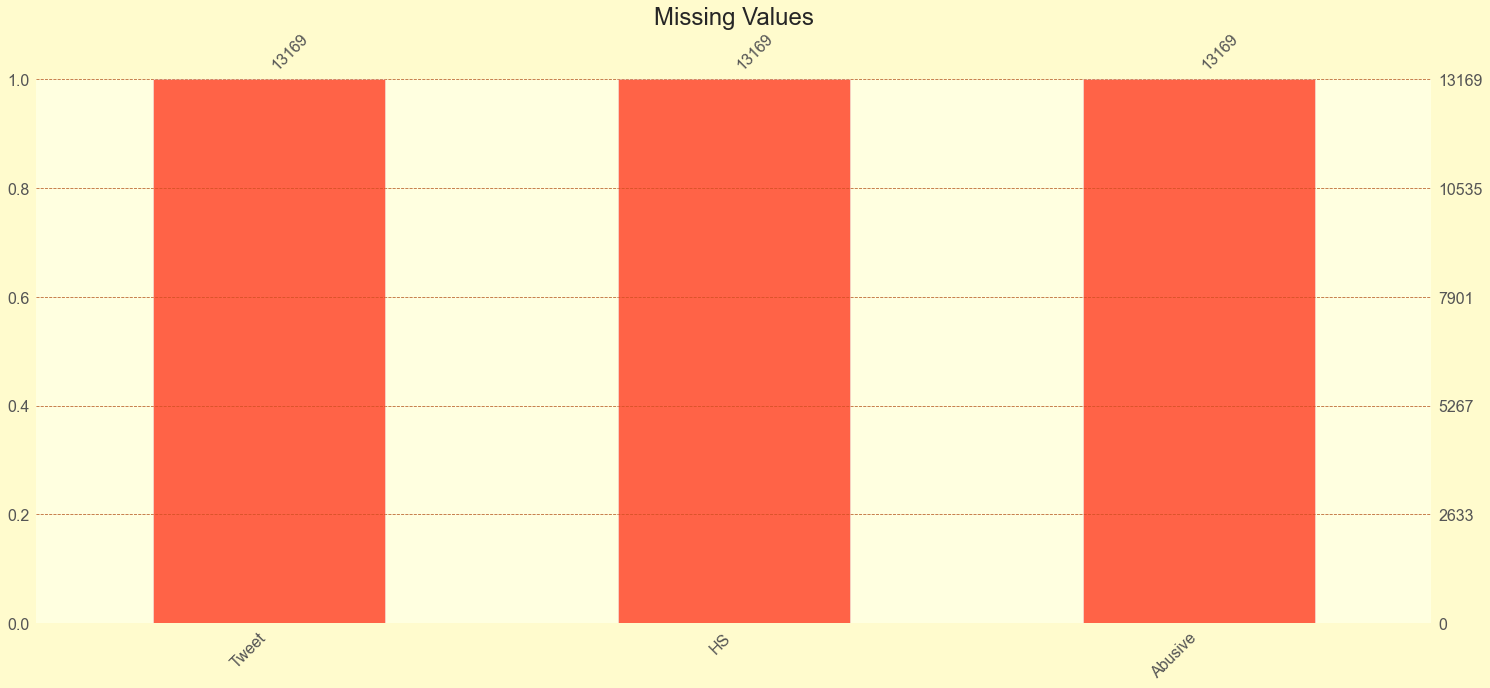

In [8]:
# Visualisasi Missing Values

msno.bar(dataset, color=(orange_black[2]))
plt.title('Missing Values', fontsize=24)
plt.show()

In [9]:
# Data Correlation

print("Data correlation :")
print(dataset.corr())

Data correlation :
               HS   Abusive
HS       1.000000  0.368595
Abusive  0.368595  1.000000


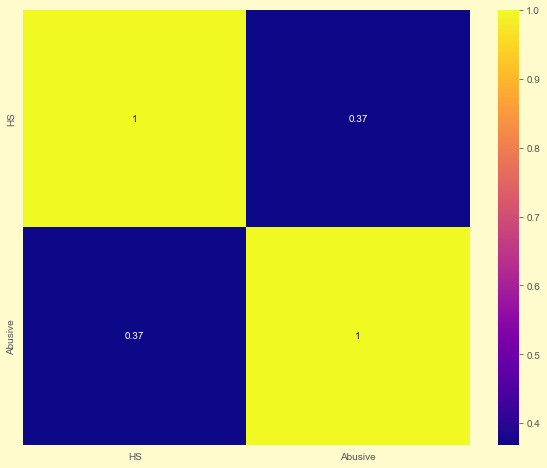

In [10]:
# Visualisasi Data Correlation

colormap = plt.cm.plasma

f, ax = plt.subplots(figsize=(10, 8))
corrMatrix = dataset.corr()
ax = sns.heatmap(corrMatrix, cmap=colormap, annot=True)
plt.show()

In [11]:
# Amount of Data

# neutral = dataset[dataset['Neutral'] == 1].shape
hate_speech = dataset[(dataset['HS'] == 1) & (dataset['Abusive'] == 0)].shape
abusive = dataset[(dataset['HS'] == 0) & (dataset['Abusive'] == 1)].shape

# print(f"Neutral: {neutral}")
print(f"Hate Speech: {hate_speech}")
print(f"Abusive: {abusive}")

Hate Speech: (2266, 3)
Abusive: (1748, 3)


In [ ]:
# # Amount of Data visualization

# temp = dataset.groupby(['HS', 'Abusive', 'Neutral']).count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
# temp.style.background_gradient(cmap=colormap)

## Unigram dan Bigram

In [12]:
# Character Length

dataset['Char_Length'] = dataset.Tweet.apply(lambda x: len(str(x)))

In [ ]:
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)

dataset['Char_Length'].iplot(kind='hist',
                             bins=100,
                             xTitle='Char_Length',
                             linecolor='black',
                             yTitle='count',
                             title='Review Text Length Distribution')

In [13]:
print(dataset.Char_Length.describe())

count    13169.000000
mean       114.202749
std         69.075620
min          4.000000
25%         59.000000
50%        100.000000
75%        152.000000
max        561.000000
Name: Char_Length, dtype: float64


In [14]:
dataset[dataset.Char_Length == 4].Tweet.iloc[0]

'Sama'

In [15]:
dataset[dataset.Char_Length == 561].Tweet.iloc[0]

"USER anjir.....\\n\\ngue ngecek berkali kali buat mastiin itu cewe beneran apa cowo, siapa tau tipuan kaya video yg lain, ternyata asli cewe \\xf0\\x9f\\x98\\xad\\n\\nterlepas dari gender, tetep gabener sih astaga \\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad\\xf0\\x9f\\x98\\xad semoga ade gue ga begini, aamiin.'"

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_word = get_top_n_words(dataset['Tweet'], 10)
common_words = get_top_n_bigram(dataset['Tweet'], 10)

In [ ]:
# The distribution of top unigrams before removing stop words

df1 = pd.DataFrame(common_word, columns = ['Tweet' , 'count'])
df1.groupby('Tweet').sum()['count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                       title='Top 10 Words in Review Before Removing Stopwords')

In [ ]:
# The distribution of top trigrams before removing stop words

df2 = pd.DataFrame(common_words,
                   columns = ['Tweet' , 'count'])

df2.groupby('Tweet').sum()['count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                       title='Top 10 Trigrams in Review Before Removing Stopwords')

In [16]:
# save dataset

dataset.to_csv("../dataset/data_modelling/data_preparation_notneutral.csv", index=False)